**Grocery Sales & Demand Forecast Analysis**
---
> **Context**

* Project Summary
* Situation Introduction
  - Process 1
  - Process 2
  - Process 3

## **Project Summary**
---

> **Project Title**

```
▶ Grocery Sales & Demand Forecast Analysis
```  

> **Project Type**

```
▶ Data EDA and Regression prediction
```



## **Situation Introduction**
---
> **Scenario** 

```
Since sales per week cannot be predicted, it is difficult to efficiently operate work schedules and manpower.
For efficient manpower management, we intend to streamline manpower management through weekly grocery market sales forecasting using public data.

Dataset: https://www.kaggle.com/datasets/varsharam/walmart-sales-dataset-of-45stores/data

```

> **Problem Statement**

```
▶ Inefficient workforce management leading to increased operational costs.

```  

> **Expected Outcome**

```
▶ Cost reduction through improved workforce efficiency.

```

> **Proposed Solution**

```
▶ Adjust workforce schedules based on weekly sales forecasts.

```

> **Performance Measurement**  

```
▶ Monitor operational costs after schedule adjustments informed by weekly sales forecasts.

```

> **Operations**  

```
▶ At the end of each week, collect relevant public and internal data to forecast next week’s sales.
▶ Input the data into the forecasting model to generate weekly sales predictions.
▶ Develop workforce plans aligned with predicted sales volumes.

```

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os

In [2]:
# ▶ Data read
import pandas as pd
df = pd.read_csv('grocery.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
import os
import matplotlib.pyplot as plt

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    IMAGES_PATH = os.path.join("images")
    os.makedirs(IMAGES_PATH, exist_ok=True)
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## **Process 1**  
 - **Sales Trend Analysis**  
---

### Data Preprocessing  
---
* Review the basic characteristics of the collected dataset: 

  (1) Check data shape

  (2) Verify data type

  (3) Identify missing values

  (4) Detect outliers

In [4]:
print('df', df.shape)

df (6435, 8)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
print(df.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [7]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
# Change Fahrenheit to Celsius for universal metric
df['Temperature']= (df['Temperature']-32) / 1.8
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,8.055556,2.625,211.350143,8.106


In [9]:
df['Temperature'].describe()

count    6435.000000
mean       15.924324
std        10.247185
min       -18.922222
25%         8.588889
50%        17.038889
75%        23.855556
max        37.855556
Name: Temperature, dtype: float64

In [10]:
import datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


### Sales Trend Analysis
---



In [12]:
len(df['Store'].unique())

45

In [13]:
df['Store'].nunique()

45

In [14]:
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,8.055556,2.625,211.350143,8.106


In [15]:
df = df.sort_values(by=['Date'])
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106
1287,10,2010-02-05,2193048.75,0,12.411111,2.962,126.442065,9.765
5148,37,2010-02-05,536006.73,0,7.761111,2.572,209.852966,8.554
2288,17,2010-02-05,789036.02,0,-4.938889,2.666,126.442065,6.548
4147,30,2010-02-05,465108.52,0,3.916667,2.572,210.752605,8.324


In [16]:
df['Date'].min(), df['Date'].max()

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

In [17]:
df1 = df[df['Store']==1].sort_values(by=['Date'])
df1.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,8.055556,2.625,211.350143,8.106
5,1,2010-03-12,1439541.59,0,14.327778,2.667,211.380643,8.106
6,1,2010-03-19,1472515.79,0,12.544444,2.720,211.215635,8.106
7,1,2010-03-26,1404429.92,0,10.805556,2.732,211.018042,8.106
8,1,2010-04-02,1594968.28,0,16.816667,2.719,210.820450,7.808
9,1,2010-04-09,1545418.53,0,18.811111,2.770,210.622857,7.808


Saving figure weekly_sales_trend


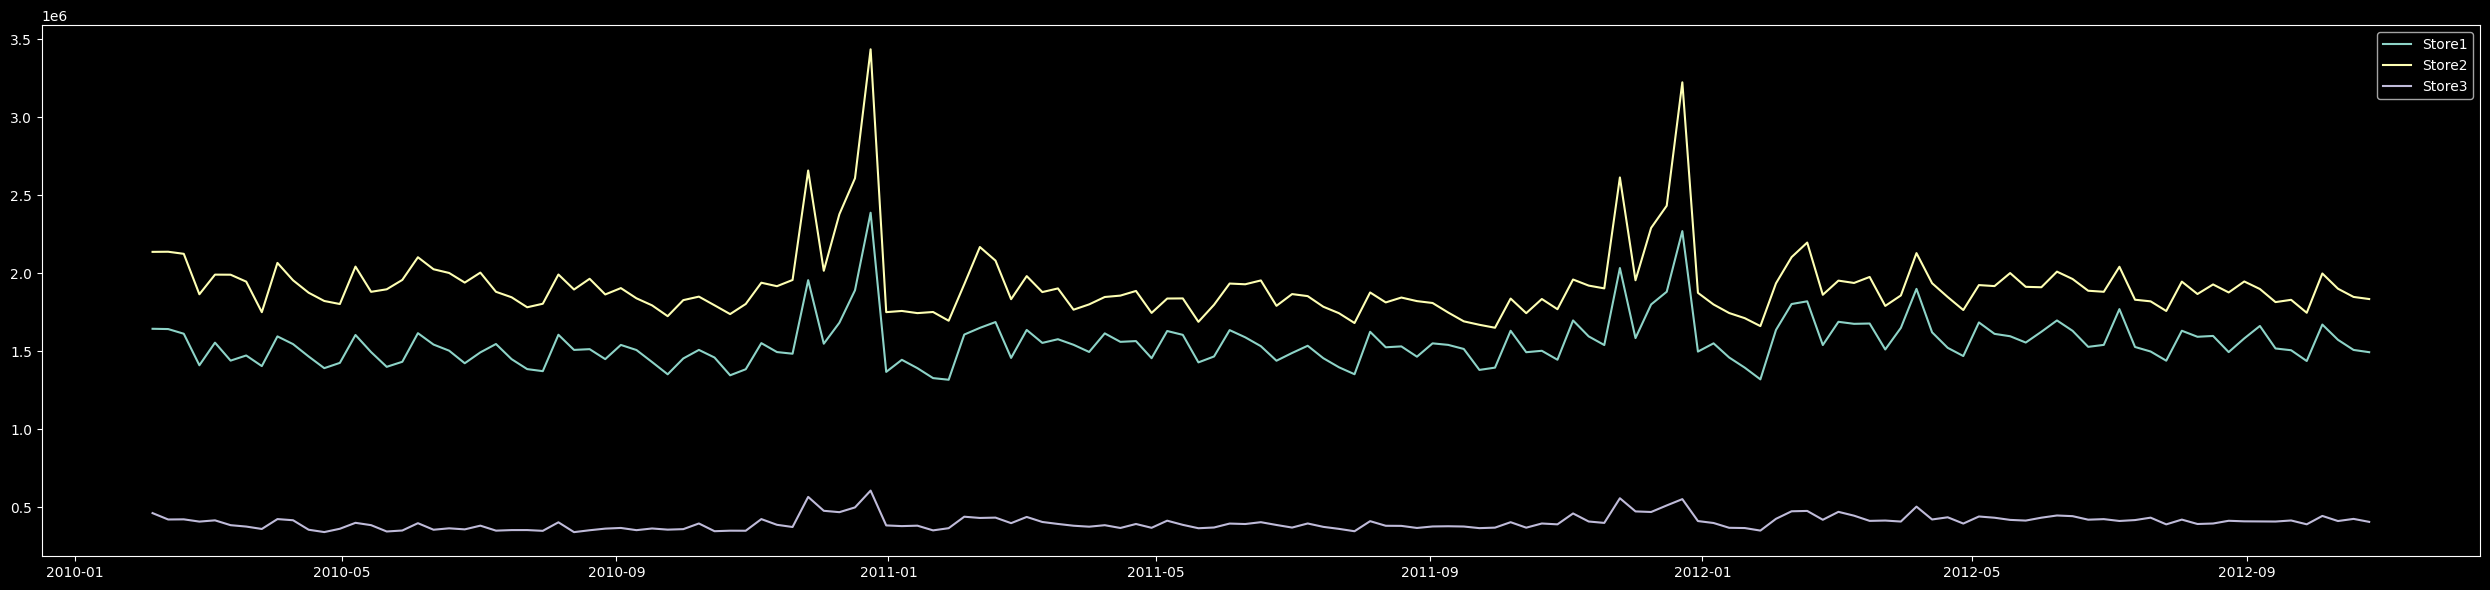

In [18]:
# Independent model needs to be created as there is a difference in sales level trends by store
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

plt.plot(df1['Date'], df1['Weekly_Sales'], label='Store1');
plt.gcf().set_size_inches(25, 6)

df2 = df[df['Store']==2].sort_values(by=['Date'])
plt.plot(df2['Date'], df2['Weekly_Sales'], label='Store2');
plt.gcf().set_size_inches(25, 6)

df3 = df[df['Store']==3].sort_values(by=['Date'])
plt.plot(df3['Date'], df3['Weekly_Sales'], label='Store3');
plt.gcf().set_size_inches(25, 6)

save_fig("weekly_sales_trend")

plt.legend()

In [19]:
# Store1 and store2 have similar weekly sales, but store3 has different sales levels
df_concat = pd.DataFrame({'Date' : list(df1['Date']) ,
                          'Store1_sales': list(df1['Weekly_Sales']),
                          'Store2_sales': list(df2['Weekly_Sales']),
                          'Store3_sales': list(df3['Weekly_Sales'])})
df_concat

,Date,Store1_sales,Store2_sales,Store3_sales
0,2010-02-05,1643690.90,2136989.46,461622.22
1,2010-02-12,1641957.44,2137809.50,420728.96
2,2010-02-19,1611968.17,2124451.54,421642.19
3,2010-02-26,1409727.59,1865097.27,407204.86
4,2010-03-05,1554806.68,1991013.13,415202.04
...,...,...,...,...
138,2012-09-28,1437059.26,1746470.56,389813.02
139,2012-10-05,1670785.97,1998321.04,443557.65
140,2012-10-12,1573072.81,1900745.13,410804.39
141,2012-10-19,1508068.77,1847990.41,424513.08


## **Process 2**  
- **Analysis of Sales Impact by Variables**  
---


### line plot -  correlation analysis
---


In [20]:
df1.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,8.055556,2.625,211.350143,8.106


In [21]:
# Holiday
df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

Saving figure external_factors_trend


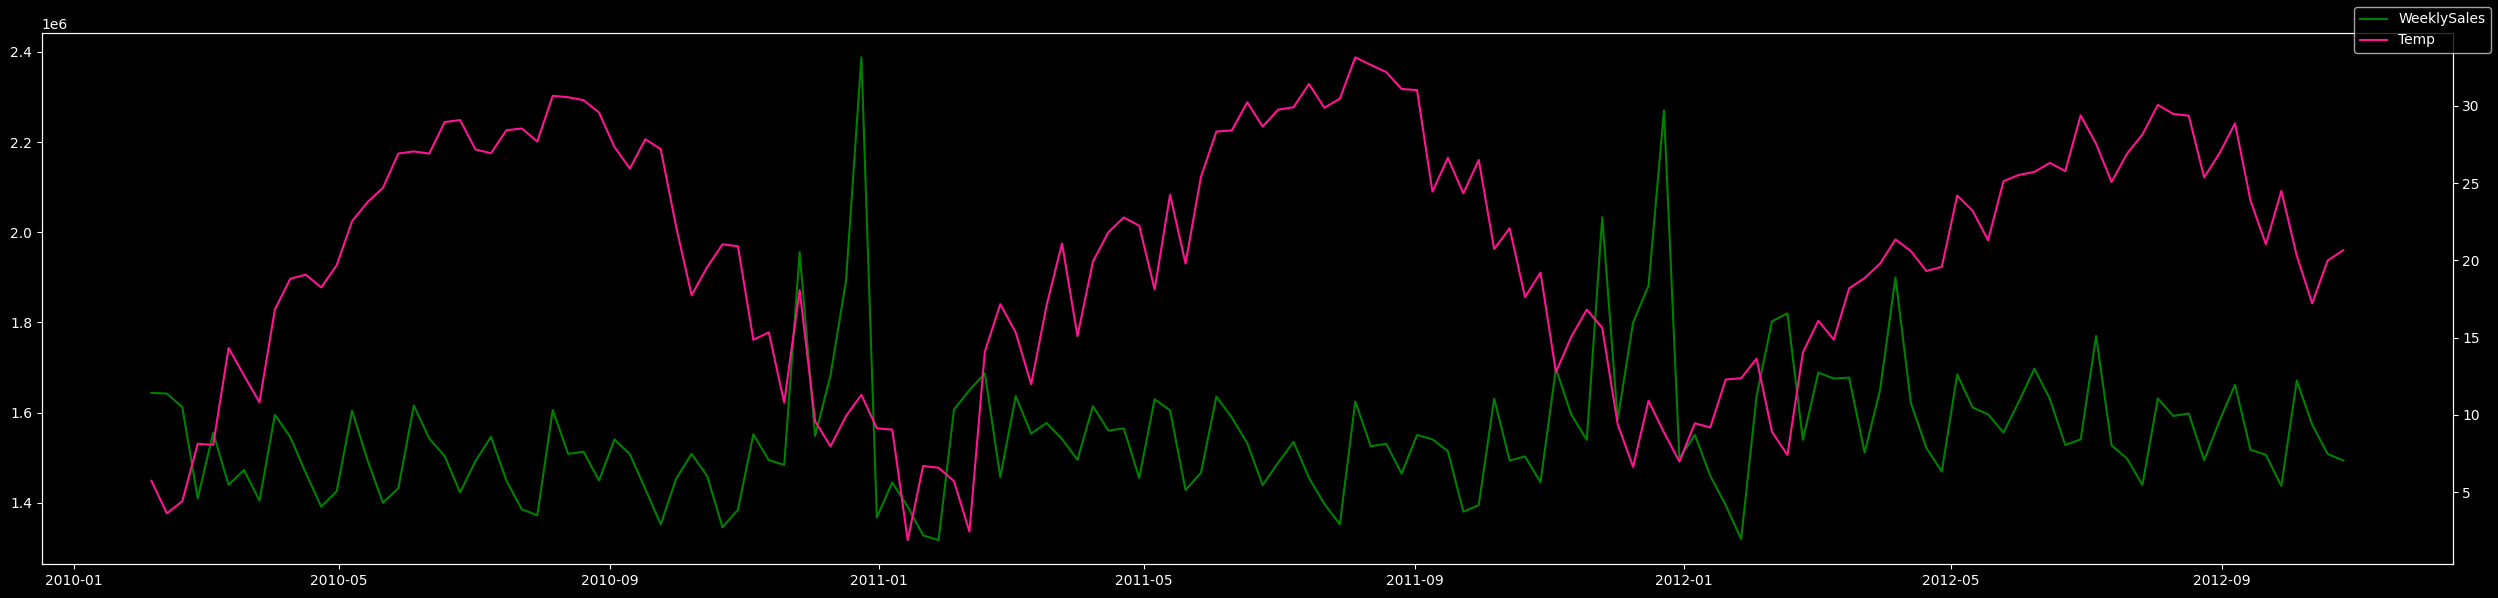

In [22]:
# Temperature and weekly sales volume: a slight tendency for sales volume to decrease as temperatures rise and sales volume to increase as temperatures fall

fig, ax1 = plt.subplots()
ax1.plot(df1['Date'], df1['Weekly_Sales'], color='green', label='WeeklySales')

ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['Temperature'], color='deeppink', label='Temp')

plt.gcf().set_size_inches(25, 6)
fig.legend()
save_fig("external_factors_trend")
plt.show()


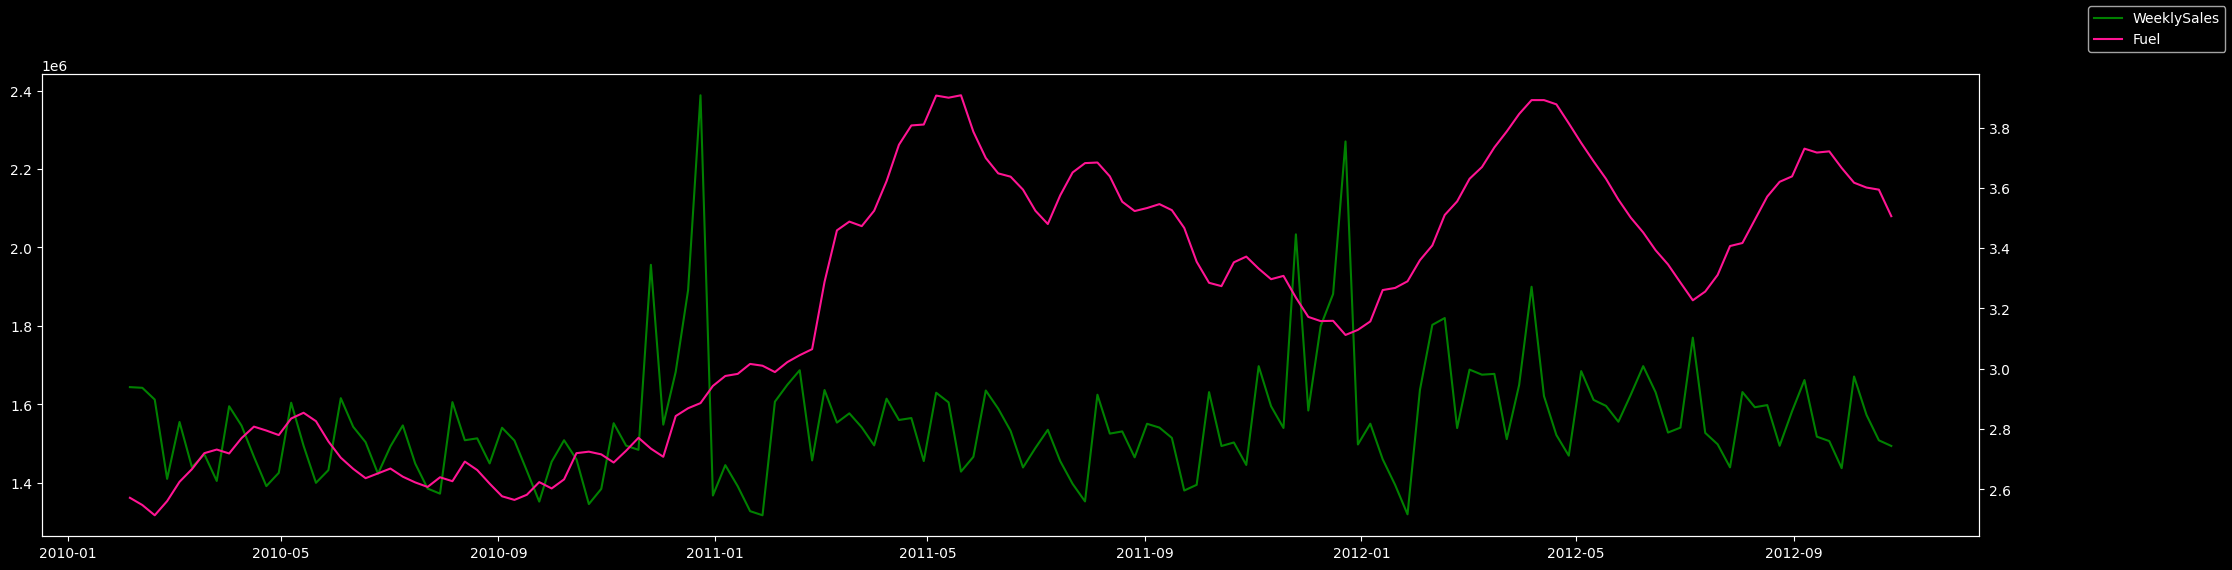

In [23]:
# fuel prices and weekly sales

fig, ax1 = plt.subplots()
ax1.plot(df1['Date'], df1['Weekly_Sales'], color='green', label= 'WeeklySales')

ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['Fuel_Price'], color='deeppink', label='Fuel')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()

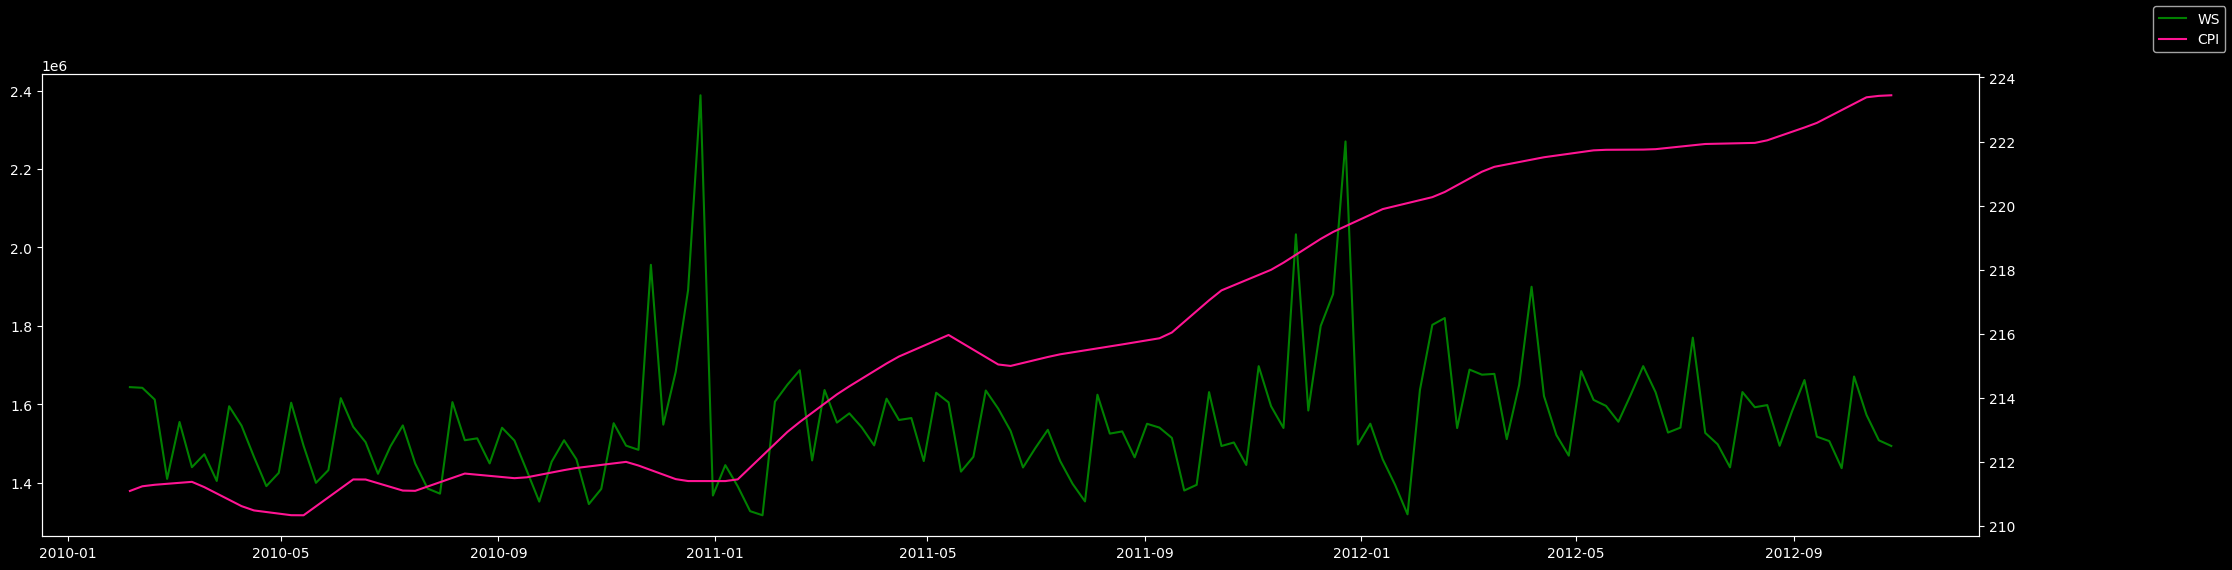

In [24]:
# CPI and weekly sales

fig, ax1 = plt.subplots()
ax1.plot(df1['Date'], df1['Weekly_Sales'], color='green', label='WS')

ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['CPI'], color='deeppink', label='CPI')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()

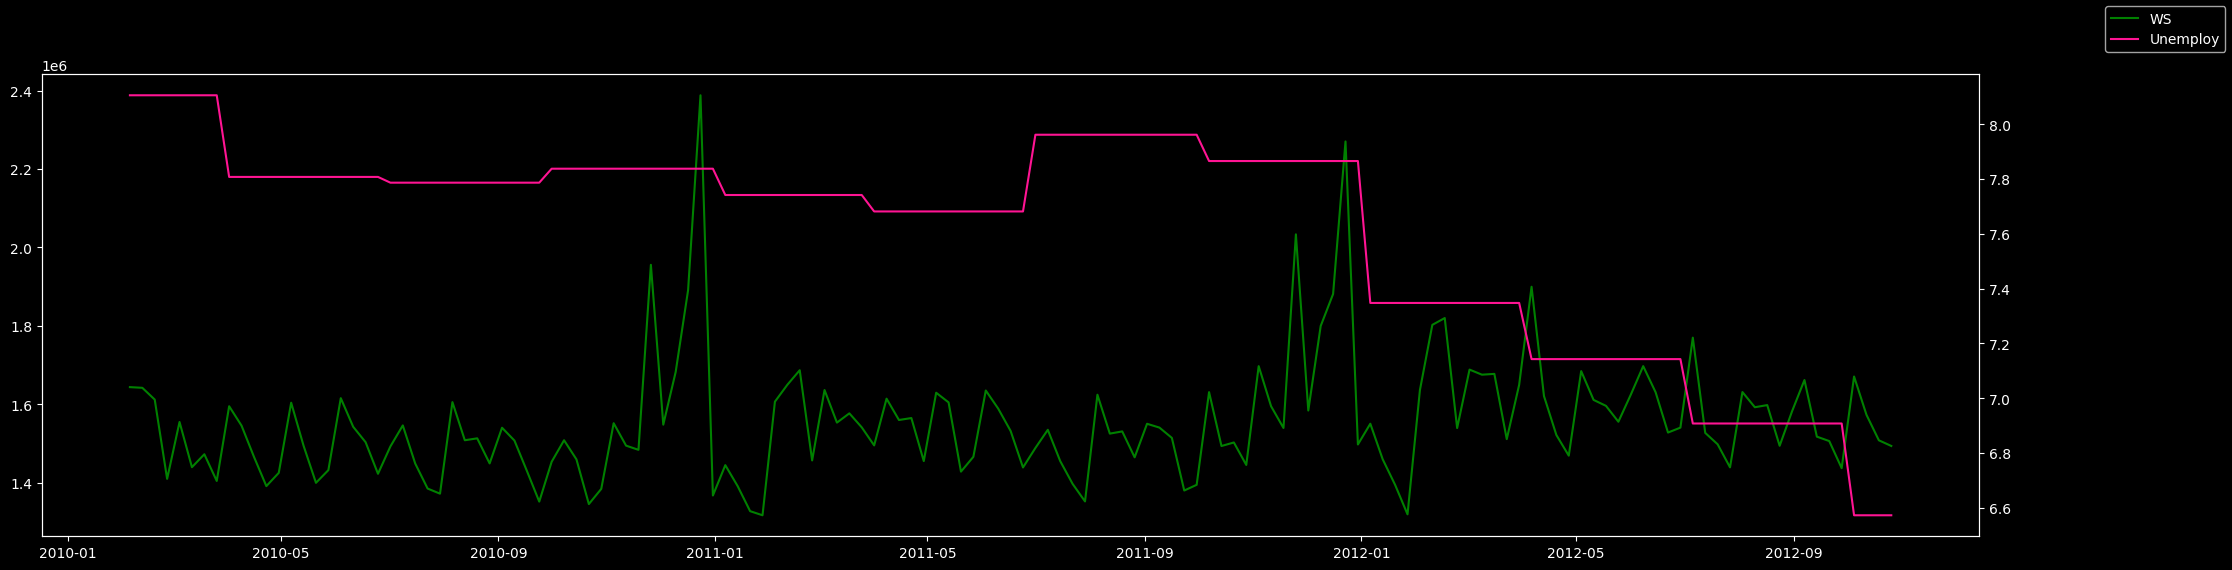

In [25]:
# unemployment and weekly sales

fig, ax1 = plt.subplots()
ax1.plot(df1['Date'], df1['Weekly_Sales'], color='green', label='WS')

ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['Unemployment'], color='deeppink',label='Unemploy')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()

### heat map - correlation analysis
---



In [26]:
df1.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,8.055556,2.625,211.350143,8.106


In [27]:
df_corr = df1.drop(['Store', 'Holiday_Flag', 'Date'], axis=1)
df_corr.corr()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,-0.222701,0.124592,0.225408,-0.097955
Temperature,-0.222701,1.000000,0.228493,0.118503,-0.180695
Fuel_Price,0.124592,0.228493,1.000000,0.755259,-0.513944
CPI,0.225408,0.118503,0.755259,1.000000,-0.813471
Unemployment,-0.097955,-0.180695,-0.513944,-0.813471,1.000000


Saving figure corr_heatmap


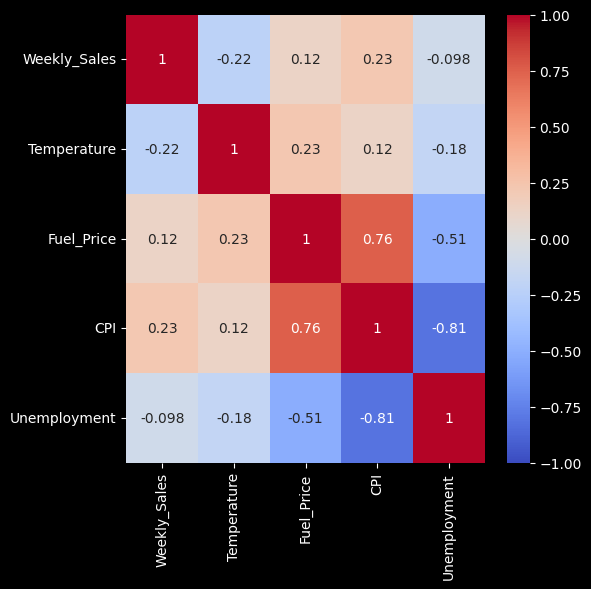

In [28]:
# heat map analysis without continuous variable

df_corr = df1.drop(['Store', 'Holiday_Flag', 'Date'], axis=1)

sns.heatmap(df_corr.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm');
plt.gcf().set_size_inches(6, 6)
save_fig("corr_heatmap")

Saving figure temp_vs_sales


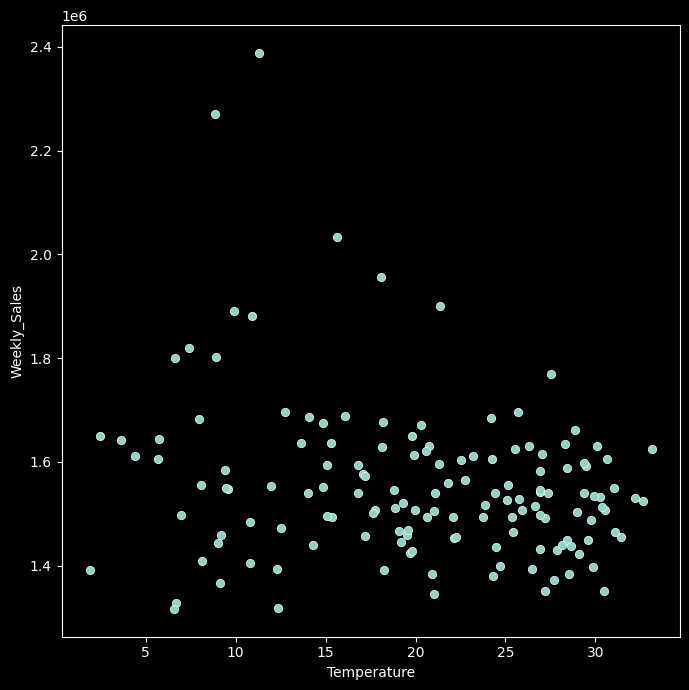

In [29]:
# Scatter plot between Unemployment and weekly sales
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df1);
plt.gcf().set_size_inches(7, 7)
save_fig("temp_vs_sales")

## **Process 3**
- **Machine Learning Utilization Purchasing Volume Forecast**
---

### Data Preparation for Modeling

---
* Split the dataset into features (X) and target variable (y).
* Divide the data into training and test sets for model training and evaluation.

In [30]:
df1.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,8.055556,2.625,211.350143,8.106


In [31]:
# Extract months and days from date data and use them as new derivatives

df1['Dayofweek'] = df1['Date'].dt.dayofweek
df1['month'] = df1['Date'].dt.month
df1.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Dayofweek,month
0,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106,4,2
1,1,2010-02-12,1641957.44,1,3.616667,2.548,211.242170,8.106,4,2
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106,4,2
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106,4,2
4,1,2010-03-05,1554806.68,0,8.055556,2.625,211.350143,8.106,4,3


In [32]:
len(df1)

143

In [33]:
# Distinguish Fearue(X) and Y data for learning modeling

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

X=df1.drop(['Store', 'Date', 'Weekly_Sales', 'CPI'], axis=1)
Y=df1['Weekly_Sales']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=1239)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(85, 6)
(85,)
(58, 6)
(58,)


### Model Learning and Evaluation
---
* Evaluate performance by learning models and performing predictions

In [34]:
rfr = RandomForestRegressor(n_estimators=500, max_depth=4, random_state=1239)
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=500, random_state=1239)

In [35]:
# Forecast
# predicts and evaluates both the data used for learning and the test data 

import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)


mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  64893.74213161644
r2_score(r2):  0.6430500989188902

mae_test(mae):  95725.46992720911
r2_score(r2):  0.22772920123985674


In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


poly = PolynomialFeatures(degree=2, include_bias=True)

X_train_poly = poly.fit_transform(x_train)

lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

X_test_poly = poly.transform(x_test)

y_pred_test = lin_reg.predict(X_test_poly)


mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)

r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_test(mae):  101443.77704378963
r2_score(r2):  0.1630337843694205


In [37]:
# Change expression into numeric
pd.options.display.float_format = '{:.2f}'.format

result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_test})
result['diff'] = result['Real Values'] - result['Predicted Values']
result.head(5)

,Real Values,Predicted Values,diff
142,1493659.74,1498839.65,-5179.91
43,1548033.78,1599718.27,-51684.49
29,1449142.92,1481750.63,-32607.71
21,1492418.14,1488577.63,3840.51
77,1352219.79,1464768.61,-112548.82


Saving figure pred_vs_actual_scatter


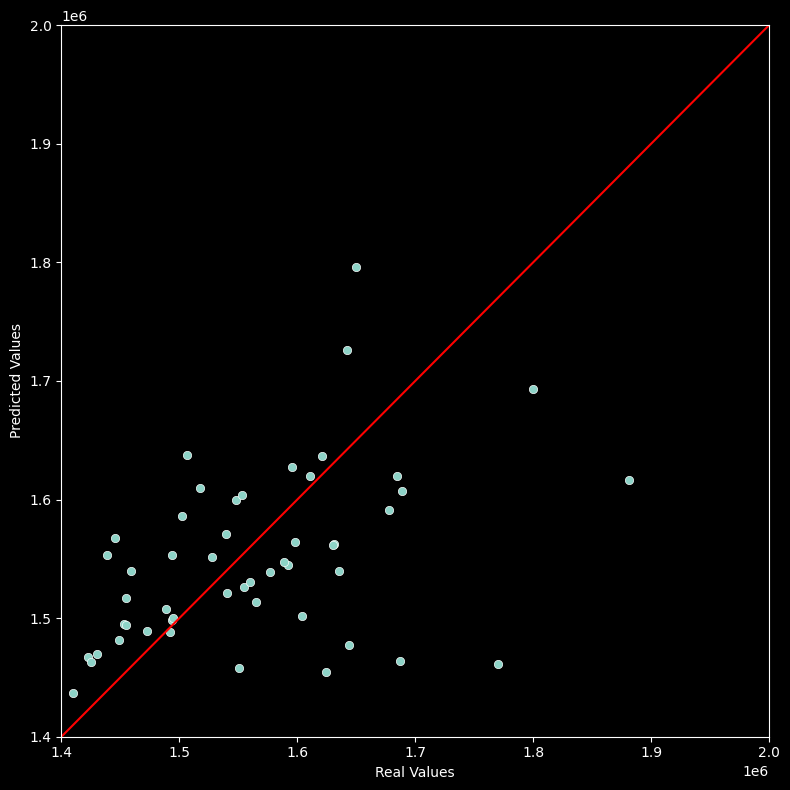

In [38]:
# Adjust xlim and ylim to see if linear fitting works properly

sns.scatterplot(x=result['Real Values'], y=result['Predicted Values'])

plt.xlim(1400000, 2000000)
plt.ylim(1400000, 2000000)

x = [1400000, 2000000]
y = [1400000, 2000000]
plt.plot(x, y, color='red')

plt.gcf().set_size_inches(8 ,8)
save_fig("pred_vs_actual_scatter")

Saving figure pred_vs_actual_line


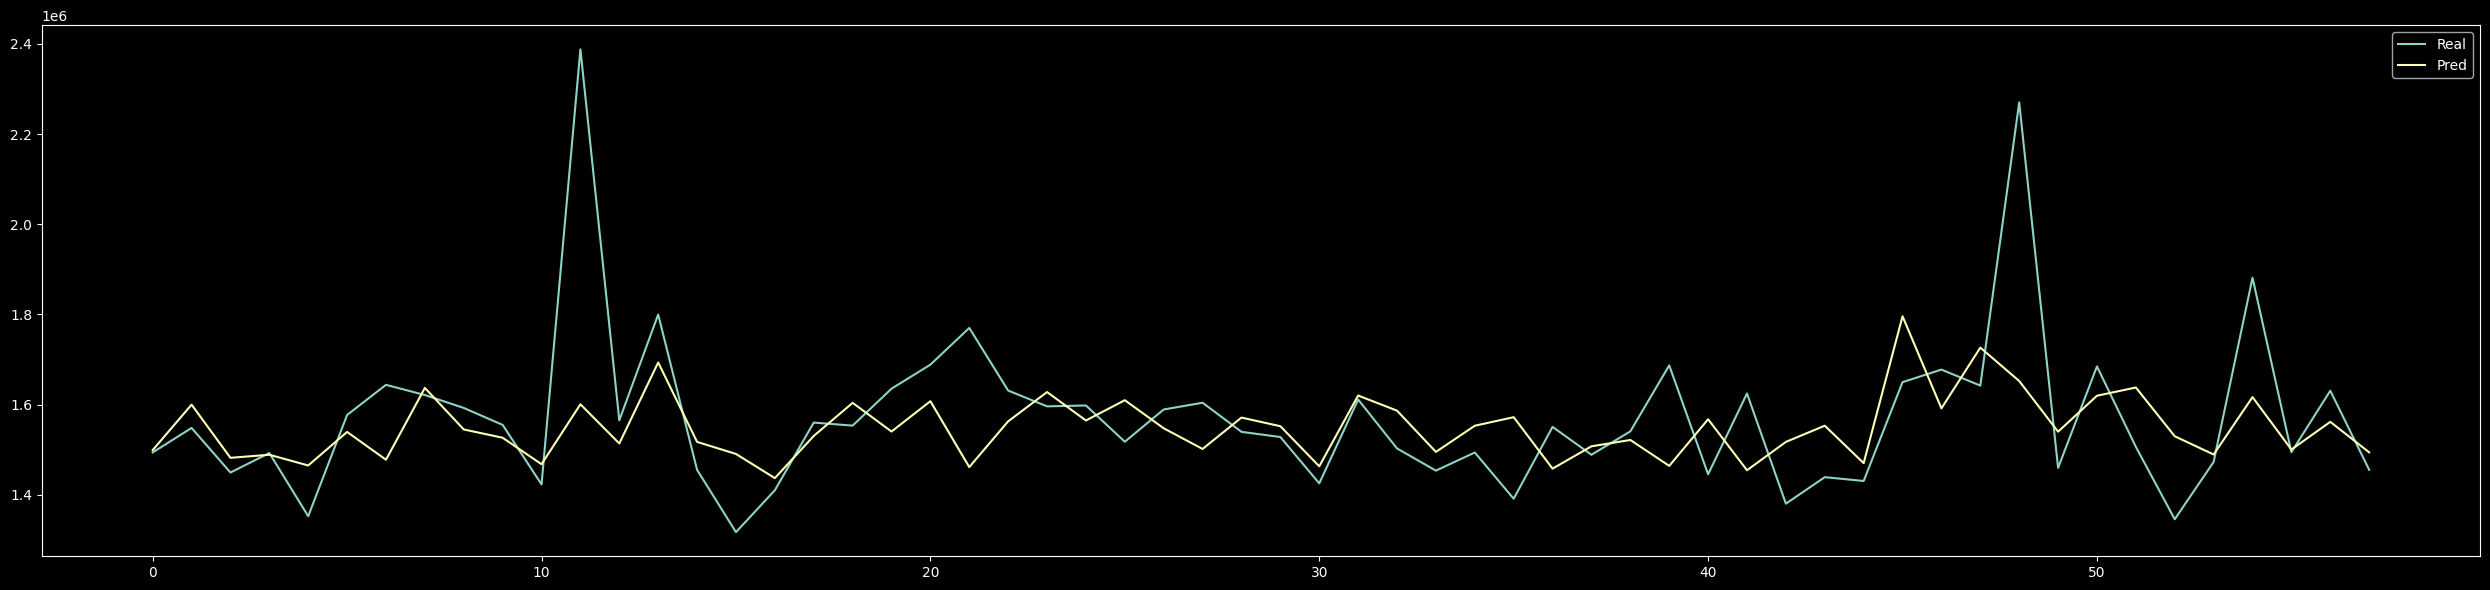

In [39]:
# failed to match the actual value with the predicted value plotting, peak
result = result.reset_index(drop=True)

plt.plot(result.index, result['Real Values'], label='Real');
plt.plot(result.index, result['Predicted Values'], label='Pred');
plt.legend()
plt.gcf().set_size_inches(25, 6)
save_fig("pred_vs_actual_line")

### Identifying Key Features

---
* Analyze feature importance to determine the most influential variables.


Saving figure rf_feature_importance


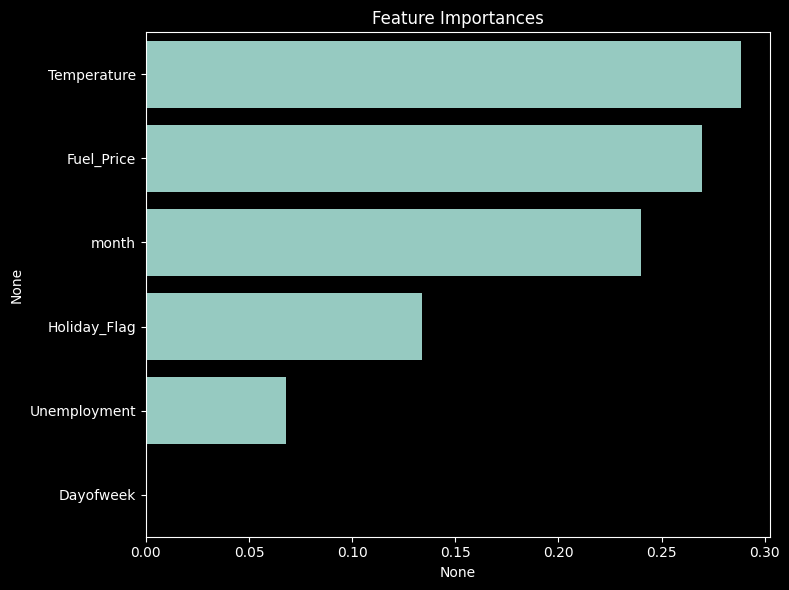

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfr.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
save_fig("rf_feature_importance")
plt.show()

In [41]:
df1.groupby('Dayofweek')['Weekly_Sales'].mean().sort_values(ascending=False)

Dayofweek
4   1555264.40
Name: Weekly_Sales, dtype: float64

### Save and Read Model
---

In [42]:
import pickle
#save model
saved_model = pickle.dumps(rfr)

#read model
rfr_from_pickle = pickle.loads(saved_model)